# Background


**The 2019 Indonesian Presidential Election** was one of the most dynamic and impactful political events in the country's democratic history.

**Twitter** served as the primary platform for people to express their opinions about the election. With approximately 5.7 million tweets per day discussing the topic, this vast amount of data presents opportunities for various types of analysis, including sentiment analysis.

**Sentiment Analysis** plays a crucial role in understanding public opinion on candidates and emerging political issues. The insights gained from this analysis can assist campaign teams, media, researchers, and the public in identifying trends and public perceptions. By analyzing sentiment, we can uncover key issues highlighted by the public, their perspectives on candidates, levels of support, and the influence of misinformation.


# Objectives


1. Determine the best algorithm (Random Forest vs LSTM) for sentiment analysis.
2. Optimizing text data processing with various preprocessing techniques such as stemming, stopwords removal, tokenization, text normalization, etc.
3. Comparing model performance based on evaluation matrices such as accuracy, precision, recall, and F1-score to select the best model.



# Data Understanding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_sentimen =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweet.csv', index_col = 0)

In [4]:
data_sentimen

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [5]:
data_sentimen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 42.5+ KB


Dataset consists of 1.815 row and 3 column

In [6]:
print(f'Label Value: {data_sentimen["sentimen"].unique()}')

Label Value: ['negatif' 'netral' 'positif']


Calculate the Amount of Data for Each Label

In [7]:
sentimen_positif = data_sentimen[data_sentimen["sentimen"] == "positif"]
sentimen_netral = data_sentimen[data_sentimen["sentimen"] == "netral"]
sentimen_negatif = data_sentimen[data_sentimen["sentimen"] == "negatif"]

In [8]:
jumlah_positif = sentimen_positif["sentimen"].count()
jumlah_netral = sentimen_netral["sentimen"].count()
jumlah_negatif = sentimen_negatif["sentimen"].count()

Dataset Label Visualization

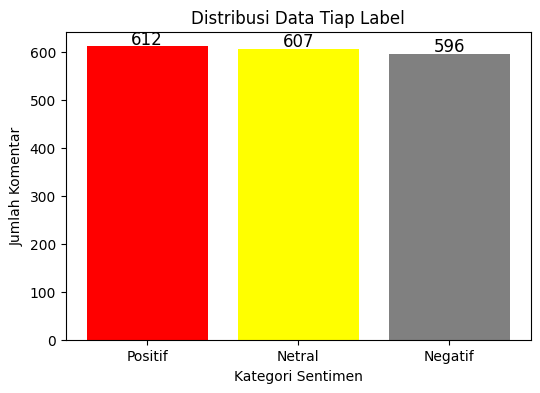

In [9]:
labels = ['Positif', 'Netral', 'Negatif']
values = [jumlah_positif, jumlah_netral, jumlah_negatif]

plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['red', 'yellow', 'grey'])

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Komentar")
plt.title("Distribusi Data Tiap Label")

for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

plt.show()

# Text Preprocessing


## Remove Punctuation, Special Character, URLS, and Hashtag

In [10]:
import re
# Function to remove Punctuation, Special Character, URLS, dan Hashtag
def remove_punctuation_and_special_character(df):
  df = re.sub(r'[^a-zA-Z0-9\s]', '', df)
  df = re.sub(r'http\S+', '', df)
  df = re.sub(r'@\w+', '', df)
  df = re.sub(r'#\w+', '', df)
  return df

In [11]:
data_sentimen['tweet'] = data_sentimen['tweet'].apply(remove_punctuation_and_special_character)

## Convert into Lower Case Format

In [12]:
data_sentimen['tweet'] = data_sentimen['tweet'].str.lower()

## Normalize Text

In [13]:
normalization_dict = {
    'gak': 'tidak',
    'ga': 'tidak',
    'gk': 'tidak',
    'tdk': 'tidak',
    'bgt': 'banget',
    'bangettt': 'banget',
    'bgt bgt': 'banget',
    'tp': 'tapi',
    'tpi': 'tapi',
    'tpii': 'tapi',
    'udh': 'sudah',
    'sdh': 'sudah',
    'sdah': 'sudah',
    'pengen': 'ingin',
    'pngn': 'ingin',
    'kpn': 'kapan',
    'kapan2': 'kapan-kapan',
    'gimana': 'bagaimana',
    'gmn': 'bagaimana',
    'bener': 'benar',
    'beneran': 'benar',
    'sy': 'saya',
    'sll': 'selalu',
    'aq': 'saya',
    'gue': 'saya',
    'gw': 'saya',
    'lu': 'kamu',
    'loe': 'kamu',
    'kmu': 'kamu',
    'km': 'kamu',
    'trs': 'terus',
    'trus': 'terus',
    'dg': 'dengan',
    'dgn': 'dengan',
    'dr': 'dari',
    'dri': 'dari',
    'dlm': 'dalam',
    'dgn': 'dengan',
    'yg': 'yang',
    'y': 'yang',
    'sm': 'sama',
    'sama2': 'sama-sama',
    'smua': 'semua',
    'smw': 'semua',
    'nya': '',
    'aja': 'saja',
    'jg': 'juga',
    'jga': 'juga',
    'jd': 'jadi',
    'jdi': 'jadi',
    'udh': 'sudah',
    'udah': 'sudah',
    'kalo': 'kalau',
    'klo': 'kalau',
    'kl': 'kalau',
    'bs': 'bisa',
    'bisaa': 'bisa',
    'aja': 'saja',
    'pd': 'pada',
    'hrs': 'harus'
}


In [14]:
def normalize_text(text):
    text = ' '.join([normalization_dict.get(word, word) for word in text.split()])
    return text

In [15]:
data_sentimen['tweet'] = data_sentimen['tweet'].apply(normalize_text)

## Tokenization


In [16]:
from collections import Counter

In [17]:
def tokenize_tweet(text):
    if isinstance(text, str):
        return text.split()
    return []

In [18]:
data_sentimen["tweet_tokenized"] = data_sentimen["tweet"].apply(tokenize_tweet)

In [19]:
tweet_tokenized = [token for tokens in data_sentimen["tweet_tokenized"] for token in tokens]

## Remove Stopwords

In [20]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
def stopwords_removal(text):
    stop_words = set(stopwords.words("indonesian"))
    additional_stopwords = {'yg', 'ya', 'gak', 'ga', 'nya', 'kalo', 'klo', 'kl', 'utk', 'tp', 'aja', 'krn', 'lu', 'pa', 'tdk', 'si', 'sih', 'jg', 'jd', 'dg', 'dr','pa','udah'}
    stop_words.update(additional_stopwords)
    cleaned_text = [word for word in text if word not in stop_words]
    return cleaned_text

In [22]:
data_sentimen["tweet_cleaned"] = data_sentimen["tweet_tokenized"].apply(stopwords_removal)

## Lemmatization Using KBBI

In [23]:
pip install KBBI

In [24]:
from kbbi import KBBI


def lemmatize_text(tokens):
    lemmatized_words = []

    for token in tokens:
        try:
            lemma = KBBI(token).lemma()[0]
        except:
            lemma = token
        lemmatized_words.append(lemma)

    return " ".join(lemmatized_words)

In [25]:
data_sentimen["tweet_lemmatized"] = data_sentimen["tweet_cleaned"].apply(lemmatize_text)

## Stemming

In [26]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.8 MB/s eta 0:00:00


In [27]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [28]:
def stemming_text(text):
    return stemmer.stem(text)

In [29]:
data_sentimen["tweet_stemmed"] = data_sentimen["tweet_lemmatized"].apply(stemming_text)

## POS Tagging & Named-Entity Recognition

In [30]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 41.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [31]:
import stanza

stanza.download('id')
nlp = stanza.Pipeline(lang='id', processors='tokenize,pos')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package    |
--------------------------
| tokenize  | gsd        |
| mwt       | gsd        |
| pos       | gsd_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Done loading processors!


In [32]:
# Function for performing POS Tagging using Stanza
def process_stanza(text):
    doc = nlp(text)
    pos_tags = [(word.text, word.upos) for sentence in doc.sentences for word in sentence.words]
    return pos_tags

In [33]:
data_sentimen["pos_tagged_tweet"] = data_sentimen["tweet_stemmed"].apply(process_stanza)

In [34]:
data_sentimen["text_after_tagged"] = data_sentimen["pos_tagged_tweet"].apply(lambda pos_tags: " ".join([word for word, pos in pos_tags]))

In [35]:
!pip install -U spacy
!python -m spacy download xx_ent_wiki_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11

In [36]:
import spacy

nlp_spacy = spacy.load("xx_ent_wiki_sm")

def process_ner(text):
    doc = nlp_spacy(text)
    ner_entities = [(ent.text, ent.label_) for ent in doc.ents]
    return ner_entities

In [37]:
data_sentimen["after_ner"] = data_sentimen["text_after_tagged"].apply(process_ner)

## Padding

In [38]:
data_sentimen["after_ner_string"] = data_sentimen["after_ner"].apply(lambda x: " ".join([entity[0] for entity in x]))

In [39]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_sentimen["after_ner_string"])

data_sentimen["after_ner2"] = tokenizer.texts_to_sequences(data_sentimen["after_ner_string"])

In [40]:
max_length = 200
data_sentimen["padded_tweet"] = pad_sequences(
    data_sentimen["after_ner2"], maxlen=max_length, padding="post", truncating="post"
).tolist()

## Vectorization

### Frequency Based Vectorization Using TF-IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

TF-IDF performs optimally with clean and meaningful text, such as preprocessed data or NER results (after_ner_string), as it assigns weights based on the frequency of important words. In contrast, padded tweets contain empty tokens (padding) that lack meaning, which can introduce bias in the calculations.

In [42]:
frequency_vectorizer = TfidfVectorizer()
tfidf = frequency_vectorizer.fit_transform(data_sentimen["after_ner_string"])

In [43]:
print("TF-IDF Shape :", tfidf.shape)

TF-IDF Shape : (1815, 1767)


### Prediction Based Vectorization Using Word2Vec

In [44]:
from gensim.models import Word2Vec

In [45]:
padded_tweet = data_sentimen["padded_tweet"]

In [46]:
# Melatih Word2Vec
word2vec = Word2Vec(sentences=padded_tweet, vector_size=100, window=5, min_count=1, workers = 4)

In [47]:
# Menghitung rata-rata sebelum menerapkan Word2Vec ke Dataset
def avg_word2vec(tokens, model, vector_size=100):
    vector = [model.wv[token] for token in tokens if token in model.wv]
    if vector:
        return np.mean(vector, axis=0)
    else:
        return np.zeros(vector_size)

In [48]:
X_word2vec = np.array([avg_word2vec(tokens, word2vec) for tokens in padded_tweet])

In [49]:
print("Word2Vec Shape:", X_word2vec.shape)

Word2Vec Shape: (1815, 100)


### Preparing Label

In [50]:
y = data_sentimen["sentimen"]

# Data Modelling

## Combining TF-IDF Vectorization With Random Forest Algorithm:

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [52]:
# Split Data with 80:20 Ratio
X_train1, X_test1, y_train1, y_test1 = train_test_split(tfidf, y, test_size=0.2, random_state=42)

In [53]:
# Creating a Model
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train1, y_train1)

RandomForestClassifier(random_state=42)

In [54]:
# Evaluate the model using Random Forest algorithm and TF-IDF vectorization
y_pred = rf1.predict(X_test1)
print("TF-IDF + Random Forest Results:")
print(classification_report(y_test1, y_pred))

TF-IDF + Random Forest Results:
              precision    recall  f1-score   support

     negatif       0.46      0.40      0.43       115
      netral       0.37      0.55      0.44       118
     positif       0.48      0.32      0.39       130

    accuracy                           0.42       363
   macro avg       0.44      0.42      0.42       363
weighted avg       0.44      0.42      0.42       363



### Hyperparameter Tuning with RandomizedSearchCV to Optimize Model

Setting several values for the parameters, and the best value will be use to optimize the model.

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

parameter_rscv = {
    'n_estimators': randint(50, 400),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [56]:
# Initialize Model
rf1_ht = RandomForestClassifier(random_state=42)

In [57]:
# Initialize RandomizedSearchCV
rscv1 = RandomizedSearchCV(
    estimator=rf1_ht,
    param_distributions=parameter_rscv,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [58]:
rscv1.fit(X_train1, y_train1)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc1406b4d10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc140784310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc14185d710>},
                   random_state=42, scoring='accuracy')

In [59]:
# Before and After Hyperparameter Tuning Comparison
best_rf1 = rscv1.best_estimator_
y_pred_rf1_ht = best_rf1.predict(X_test1)
print("Evaluation Before Tuning:")
print(classification_report(y_test1, y_pred))
print("Evaluation After Tuning:")
print(classification_report(y_test1, y_pred_rf1_ht))
accuracy_before = accuracy_score(y_test1, y_pred)
accuracy_rf1_after = accuracy_score(y_test1, y_pred_rf1_ht)
print("Accuracy Before Tuning:", accuracy_before)
print("Accuracy After Tuning:", accuracy_rf1_after)

Evaluation Before Tuning:
              precision    recall  f1-score   support

     negatif       0.46      0.40      0.43       115
      netral       0.37      0.55      0.44       118
     positif       0.48      0.32      0.39       130

    accuracy                           0.42       363
   macro avg       0.44      0.42      0.42       363
weighted avg       0.44      0.42      0.42       363

Evaluation After Tuning:
              precision    recall  f1-score   support

     negatif       0.48      0.38      0.43       115
      netral       0.38      0.59      0.47       118
     positif       0.49      0.33      0.39       130

    accuracy                           0.43       363
   macro avg       0.45      0.44      0.43       363
weighted avg       0.45      0.43      0.43       363

Accuracy Before Tuning: 0.4214876033057851
Accuracy After Tuning: 0.4325068870523416


In [60]:
import joblib

# Saving TF-IDF + Random Forest Model
joblib.dump(rscv1, 'tfidf_rf_tuned_model.pkl')
print("TF-IDF + Random Forest model saved as 'tfidf_rf_tuned_model.pkl'")

TF-IDF + Random Forest model saved as 'tfidf_rf_tuned_model.pkl'


## Combining Word2Vec Vectorization With Random Forest Algorithm:

In [61]:
# Split Data with 80:20 Ratio
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

In [62]:
# Creating a Model
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [63]:
# Evaluate the model using Random Forest Algorithm dan Word2Vec Vectorization
y_pred = rf2.predict(X_test2)
print("Word2Vec + Random Forest Results:")
print(classification_report(y_test2, y_pred))

Word2Vec + Random Forest Results:
              precision    recall  f1-score   support

     negatif       0.28      0.26      0.27       115
      netral       0.38      0.47      0.42       118
     positif       0.40      0.34      0.37       130

    accuracy                           0.36       363
   macro avg       0.35      0.36      0.35       363
weighted avg       0.36      0.36      0.35       363



Hyperparameter Tuning with RandomizedSearchCV to Optimize Model

In [64]:
# Initialize Model
rf2_ht = RandomForestClassifier(random_state=42)

In [65]:
# Initialize RandomizedSearchCV
rscv2 = RandomizedSearchCV(
    estimator=rf2_ht,
    param_distributions=parameter_rscv,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [66]:
rscv2.fit(X_train2, y_train2)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc1406b4d10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc140784310>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dc14185d710>},
                   random_state=42, scoring='accuracy')

In [67]:
print("Best Parameters:", rscv2.best_params_)
print("Best Accuracy:", rscv2.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 18, 'n_estimators': 108}
Best Accuracy: 0.4090909090909091


In [68]:
# Before and After Hyperparameter Tuning Comparison
best_rf2 = rscv2.best_estimator_
y_pred_rf1_ht = best_rf2.predict(X_test2)
print("Evaluation Before Tuning:")
print(classification_report(y_test2, y_pred))
print("Evaluation After Tuning:")
print(classification_report(y_test2, y_pred_rf1_ht))
accuracy_before = accuracy_score(y_test2, y_pred)
accuracy_rf2_after = accuracy_score(y_test2, y_pred_rf1_ht)
print("Accuracy Before Tuning:", accuracy_before)
print("Accuracy After Tuning:", accuracy_rf2_after)

Evaluation Before Tuning:
              precision    recall  f1-score   support

     negatif       0.28      0.26      0.27       115
      netral       0.38      0.47      0.42       118
     positif       0.40      0.34      0.37       130

    accuracy                           0.36       363
   macro avg       0.35      0.36      0.35       363
weighted avg       0.36      0.36      0.35       363

Evaluation After Tuning:
              precision    recall  f1-score   support

     negatif       0.32      0.27      0.29       115
      netral       0.34      0.45      0.39       118
     positif       0.39      0.33      0.36       130

    accuracy                           0.35       363
   macro avg       0.35      0.35      0.35       363
weighted avg       0.35      0.35      0.35       363

Accuracy Before Tuning: 0.35537190082644626
Accuracy After Tuning: 0.349862258953168


In [69]:
# Saving Model
joblib.dump(rscv2, 'word2vec_rf_tuned_model.pkl')
print("Word2Vec + Random Forest model saved as 'word2vec_rf_tuned_model.pkl'")

Word2Vec + Random Forest model saved as 'word2vec_rf_tuned_model.pkl'


## Combining Word2Vec Vectorization With LSTM Algorithm:

In [70]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [71]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall
import keras_tuner as kt
import tensorflow as tf

In [72]:
np.random.seed(42)
X_word2vec = np.random.rand(1452, 100)
y = np.random.choice(['positif', 'negatif', 'netral'], size=1452)

In [73]:
# Preprocessing Data
X_word2vec_3d = np.expand_dims(X_word2vec, axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_word2vec_3d, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train2_scaled = scaler.fit_transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
X_test2_scaled = scaler.transform(X_test2.reshape(-1, X_test2.shape[-1])).reshape(X_test2.shape)

In [74]:
# Mapping Labels
label_mapping = {'positif': 1, 'negatif': 0, 'netral': 2}
y_train2 = np.array([label_mapping[label] for label in y_train2]).astype('float32')
y_test2 = np.array([label_mapping[label] for label in y_test2]).astype('float32')

In [75]:
# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train2), y=y_train2)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.9699248120300752, 1: 0.9675, 2: 1.069060773480663}


In [76]:
# Create Model with Hyperparameter Tuning
def build_lstm_model(hp):
    model = Sequential()

    for i in range(hp.Int('num_lstm_layers', 1, 3)):  # LSTM Layer
        model.add(LSTM(
            units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
            return_sequences=True if i < hp.Int('num_lstm_layers', 1, 3) - 1 else False,
            kernel_regularizer=l2(hp.Choice(f'l2_regularizer_{i}', [1e-4, 1e-3, 1e-2]))
        ))
        model.add(Dropout(hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Optimizer Option
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5]))

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])
    return model

In [77]:
# Initialize Tuner
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name='lstm_tuning_layers'
)

In [78]:
tuner.search(
    X_train2_scaled.reshape(-1, 1, 100), y_train2,
    epochs=10,
    validation_data=(X_test2_scaled.reshape(-1, 1, 100), y_test2),
    batch_size=32,
    class_weight=class_weight_dict
)

Trial 10 Complete [00h 00m 18s]
val_accuracy: 0.3814432919025421

Best val_accuracy So Far: 0.3848797380924225
Total elapsed time: 00h 02m 21s


In [79]:
# Building Model with The Best Hyperparameter
lstm2 = build_lstm_model(tuner.get_best_hyperparameters(1)[0])
lstm2.fit(
    X_train2_scaled.reshape(-1, 1, 100), y_train2,
    epochs=5,
    batch_size=32,
    validation_data=(X_test2_scaled.reshape(-1, 1, 100), y_test2),
    class_weight=class_weight_dict
)

loss_before, accuracy_before, precision_before, recall_before = lstm2.evaluate(X_test2_scaled.reshape(-1, 1, 100), y_test2)

best_model = tuner.get_best_models(num_models=1)[0]
loss_after, accuracy_after, precision_after, recall_after = best_model.evaluate(X_test2_scaled.reshape(-1, 1, 100), y_test2)

Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.3724 - loss: 0.8217 - precision: 0.7191 - recall: 0.2822 - val_accuracy: 0.3505 - val_loss: 0.8170 - val_precision: 0.6952 - val_recall: 0.3668
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3343 - loss: 0.8163 - precision: 0.6517 - recall: 0.4668 - val_accuracy: 0.3986 - val_loss: 0.8119 - val_precision: 0.7004 - val_recall: 0.8342
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3185 - loss: 0.8109 - precision: 0.6449 - recall: 0.6408 - val_accuracy: 0.3849 - val_loss: 0.8066 - val_precision: 0.6853 - val_recall: 0.9849
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3352 - loss: 0.8046 - precision: 0.6564 - recall: 0.8327 - val_accuracy: 0.3814 - val_loss: 0.8014 - val_precision: 0.6838 - val_recall: 1.0000
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3598 - loss: 0.7987 - precision: 0.6608 - recall: 0.9350 - val_accuracy: 0.3814 - val_loss: 0.7959 - va

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3933 - loss: 0.7997 - precision: 0.6857 - recall: 0.9931


In [80]:
# Providing The Best Hyperparameter
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Hyperparameters:")
print(f"Number of LSTM Layers: {best_hyperparameters.get('num_lstm_layers')}")
for i in range(best_hyperparameters.get('num_lstm_layers')):
    print(f"  Layer {i + 1}:")
    print(f"    Units: {best_hyperparameters.get(f'units_{i}')}")
    print(f"    Dropout: {best_hyperparameters.get(f'dropout_{i}')}")
    print(f"    L2 Regularizer: {best_hyperparameters.get(f'l2_regularizer_{i}')}")
print(f"Optimizer: {best_hyperparameters.get('optimizer')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")

# Function to Calculate F1-Score
def calculate_f1(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * ((precision * recall) / (precision + recall))

f1_before = calculate_f1(precision_before, recall_before)
f1_after = calculate_f1(precision_after, recall_after)

# Before and After Hyperparameter Tuning Comparison
print("\nComparison Before and After Tuning:")
print(f"Accuracy: Before = {accuracy_before}, After = {accuracy_after}")
print(f"Precision: Before = {precision_before}, After = {precision_after}")
print(f"Recall: Before = {recall_before}, After = {recall_after}")
print(f"F1-Score: Before = {f1_before}, After = {f1_after}")


Best Hyperparameters:
Number of LSTM Layers: 2
  Layer 1:
    Units: 64
    Dropout: 0.4
    L2 Regularizer: 0.0001
  Layer 2:
    Units: 96
    Dropout: 0.2
    L2 Regularizer: 0.001
Optimizer: adam
Learning Rate: 1e-05

Comparison Before and After Tuning:
Accuracy: Before = 0.3814432919025421, After = 0.3848797380924225
Precision: Before = 0.6838487982749939, After = 0.6864111423492432
Recall: Before = 1.0, After = 0.9899497628211975
F1-Score: Before = 0.812244898681589, After = 0.81069958798326


In [90]:
# Saving Model
lstm2.save('word2vec_lstm_tuned_model.h5')
print("Word2Vec + LSTM model saved as 'word2vec_lstm_tuned_model.h5'")

Word2Vec + LSTM model saved as 'word2vec_lstm_tuned_model.h5'


# Testing Model

In [101]:
import joblib

# Saving TF-IDF + Random Forest Model
joblib.dump(rscv1, 'tfidf_rf_tuned_model.pkl')

# Saving Word2Vec + Random Forest Model
joblib.dump(rscv2, 'word2vec_rf_tuned_model.pkl')

# Saving model Word2Vec + LSTM Model
joblib.dump(lstm2, 'word2vec_lstm_tuned_model.h5')


['word2vec_lstm_tuned_model.h5']

## TF-IDF + Random Forest Model

In [109]:
# Load model dan vectorizer
tfidf_rf_model = joblib.load('tfidf_rf_tuned_model.pkl')
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data_sentimen["after_ner_string"])

# Prediction Function for TF-IDF + Random Forest
def predict_sentiment_tfidf(text):
    vectorized_text = tfidf_vectorizer.transform([text])
    prediction = tfidf_rf_model.predict(vectorized_text)
    return prediction[0]

text = "Indonesia Negara Aman"
result = predict_sentiment_tfidf(text)
print("Prediksi Sentimen (TF-IDF + Random Forest):", result)


Prediksi Sentimen (TF-IDF + Random Forest): positif


## Word2Vec + Random Forest Model

In [108]:
# Load model Word2Vec + Random Forest
word2vec_rf_model = joblib.load('word2vec_rf_tuned_model.pkl')


def avg_word2vec(tokens, model, vector_size=100):
    vector = [model.wv[token] for token in tokens if token in model.wv]
    if vector:
        return np.mean(vector, axis=0)
    else:
        return np.zeros(vector_size)

# Prediction Function for Word2Vec + Random Forest
def predict_sentiment_word2vec(text, word2vec_model):
    tokens = text.split()
    vectorized_text = avg_word2vec(tokens, word2vec_model)
    prediction = word2vec_rf_model.predict([vectorized_text])
    return prediction[0]

text = "Indonesia Negara Aman"
result = predict_sentiment_word2vec(text, word2vec)
print("Prediksi Sentimen (Word2Vec + Random Forest):", result)

Prediksi Sentimen (Word2Vec + Random Forest): positif


## Word2Vec + LSTM Model

In [104]:
from tensorflow.keras.models import load_model

In [114]:
# Load model Word2Vec + LSTM
word2vec_lstm_model = load_model('word2vec_lstm_tuned_model.h5')
# Prediction Function for Word2Vec + LSTM
def predict_sentiment_lstm(text, word2vec_model):
    tokens = text.split()
    vectorized_text = avg_word2vec(tokens, word2vec_model)
    vectorized_text = vectorized_text.reshape(1, 1, 100)
    prediction = word2vec_lstm_model.predict(vectorized_text)
    label_mapping = {0: 'negatif', 1: 'positif', 2: 'netral'}
    return label_mapping[np.argmax(prediction)]

text = "Indonesia Negara Aman"
result = predict_sentiment_lstm(text, word2vec)
print("Prediksi Sentimen (Word2Vec + LSTM):", result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediksi Sentimen (Word2Vec + LSTM): negatif
